# Implementation of MMPDE5 for equidistributing mesh

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [65]:
# define exact solution and monitor function used for equidistribution 
def u(x): return x**(2.0/3.0)
def u_xx(x): return (-2.0/9.0)*x**(-4.0/3.0)
    
# use optimal density function for piecewise linear interpolation
alpha = 1
def p(x): return np.power(1 + 1/alpha*np.abs(u_xx(x))**2,1/5)

In [154]:
# create uniform computational mesh
N = 101
x_l = 0.0
x_r = 1.0
xi = np.linspace(x_l,x_r,N)

In [151]:
# use central finite difference and backward Euler for spatial and time discretization, respectively
dxi = 1/(N-1)
dt = 0.001
tau = 1

c = dt/(tau*dxi**2)

In [153]:
def compute_A(x,eps = 1e-12):
    
    A = np.zeros((N,N))
    # impose boundary conditions
    A[0,0] = 1.0
    A[-1,-1] = 1.0
    for j in range(1,N-1):
        C = c/p(x[j] + eps)
        p1 = (p(x[j+1] + eps) + p(x[j]) + eps)/2
        p2 = (p(x[j] + eps) + p(x[j-1] + eps))/2

        v1 = -C*p2
        v2 = 1 + C*p1 + C*p2
        v3 = -C*p1

        A[j,j-1:j+2] = [v1,v2,v3]
    
    return A

In [146]:
# solve linear system with 
relErr = 1

# initial condition 
x = xi

t0 = time.time()
while relErr > 1e-8:
    A = compute_A(x)
    x_new = np.linalg.solve(A, x)
    relErr = np.max(np.abs(x_new[1:-1] - x[1:-1]))
    x = x_new
    
t = time.time() - t0

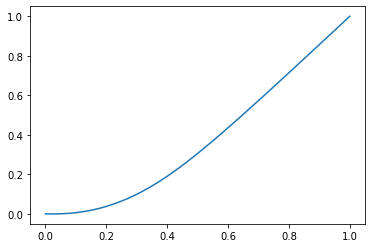

In [147]:
plt.plot(xi,x)
plt.show()

<ipython-input-65-81439ea1a580>:2: RuntimeWarning: invalid value encountered in power
  def u(x): return x**(2.0/3.0)


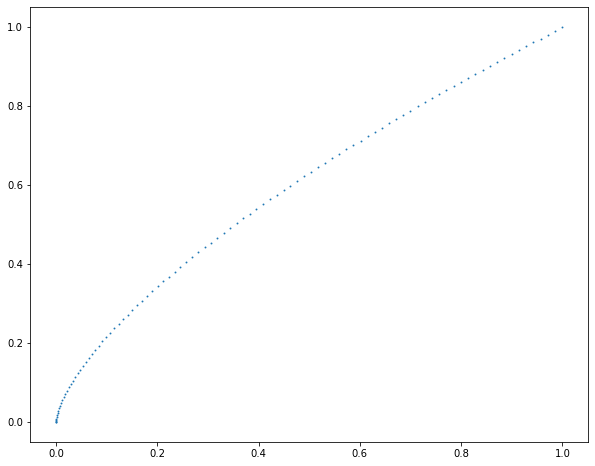

In [148]:
plt.figure(figsize = (10,8))
plt.scatter(x,u(x),s = 0.8)
plt.show()

In [149]:
# mesh quality
# error of interpolant with respect to correct solution 

4.757467031478882